# PLEGAMIENTO DE PROTEÍNAS 2D

### Realizado por: Fernando Andrés Galindo y Francisco Murillo Prior

#### Objetivos
• Comprender la teoría básica detrás del plegamiento de proteínas y la `paradoja de Levinthal`. Comparar estos conceptos con un problema de optimización.

• Identificar las distintas disciplinas necesarias para estudiar la paradoja de Levinthal. Entender la importancia de la `multidisciplinariedad`.

• Aprender a implementar un algoritmo en base a un modelo de plegamiento de proteínas 2D.

• Realizar gráficos con pyplot para representar los plegamientos de proteínas 2D.

• Aprender a usar la base de datos de proteínas `UNIPROT`.

• Documentar el trabajo realizado usando un formato de artículo científico. 

• Realizar una presentación de los resultados obtenidos. 

Diccionario con los `20 aminoacidos` y sus correspondientes valores de la variación de `Energía libre`:

In [40]:
Paa_deltaG = { 
'A': 1, # Alanine
'C': 0.17, # Cysteine
'D': -3, # Aspartic Acid
'E': -2.6, # Glutamic Acid
'F': 2.5, # Phenylalanine
'G': 0.67, # Glycine
'H': -1.7, # Histidine
'I': 3.1, # Isoleucine
'K': -4.6, # Lysine
'L': 2.2, # Leucine
'M': 1.1, # Methionine
'N': -2.7, # Asparagine
'P': -0.29,# Proline
'Q': -2.9, # Glutamine
'R': -7.5, # Arginine
'S': -1.1, # Serine
'T': -0.75,# Threonine
'V': 2.3, # Valine
'W': 1.5, # Tryptophan
'Y': 0.08 # Tyrosine
 }
 
print(Paa_deltaG)

{'A': 1, 'C': 0.17, 'D': -3, 'E': -2.6, 'F': 2.5, 'G': 0.67, 'H': -1.7, 'I': 3.1, 'K': -4.6, 'L': 2.2, 'M': 1.1, 'N': -2.7, 'P': -0.29, 'Q': -2.9, 'R': -7.5, 'S': -1.1, 'T': -0.75, 'V': 2.3, 'W': 1.5, 'Y': 0.08}


Clasificación de aminoácidos si son hidrofílicos (Energía libre < -1.5) o hidrofóbicos (Energía libre > -1.5)

Proteinas sencillas seleccionadas: insulina, colágeno y albúmina

### Ejercicio 1: Función Get Spatial Dic

Se pide implementar una función `get_spatial_dic(protein, structure)` que recibe una cadena 
representando una proteína (letras de aminoácidos) y otra cadena representando su estructura 
(I para el aminoácido inicial, N, S, E o W según la posición relativa de un aminoácido con respecto 
al anterior) y devuelve un diccionario o un diccionario vacío si existen solapamientos. Las claves 
de dicho diccionario serán tuplas de dos números enteros representando `coordenadas`
espaciales y los valores serán letras de aminoácidos.

In [111]:
def get_spatial_dic(protein, structure): #AHURGBXZ #INWESNEW
    res = {}
    if len(protein) != len(structure):
        return "ERROR: The size of the protein and structure must be the same"
    coordenadas = [0,0]
    res[tuple(coordenadas)] = protein[0]
    protein = list(protein)
    structure = list(structure)
    data = zip(protein,structure)
    for i in data:
        if i[1] == 'N':
            coordenadas[1] += 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
        elif i[1] == 'S':
            coordenadas[1] -= 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
        elif i[1] == 'E':
            coordenadas[0] += 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
        elif i[1] == 'W':
            coordenadas[0] -= 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
    return res

In [112]:
protein = get_spatial_dic("AHSRTWQPMSCCFGNLYEDP", "IESWWNWNENENWNEESSSW")
protein

{(0, 0): 'A',
 (1, 0): 'H',
 (1, -1): 'S',
 (0, -1): 'R',
 (-1, -1): 'T',
 (-1, 0): 'W',
 (-2, 0): 'Q',
 (-2, 1): 'P',
 (-1, 1): 'M',
 (-1, 2): 'S',
 (0, 2): 'C',
 (0, 3): 'C',
 (-1, 3): 'F',
 (-1, 4): 'G',
 (0, 4): 'N',
 (1, 4): 'L',
 (1, 3): 'Y',
 (1, 2): 'E',
 (1, 1): 'D',
 (0, 1): 'P'}

### Ejercicio 2

Se pide implementar una función is_hydrophobic(aa

In [80]:
def is_hydrofobic(aa):
    res = False
    for aminoacido, energia in Paa_deltaG.items():
        if aminoacido == aa:
            res = energia > -1.5
    return res

In [81]:
is_hydrofobic('S')

True

Se pide implementar una función `get_score(dic)` que reciba un diccionario representando la estructura espacial de una proteína y devuelva su puntuación. La puntuación de un aminoácido será ΔG * N (si el aminoácido no es hidrofóbico) y ΔG * N + 10 * N (si el aminoácido es hidrofóbico). Siendo N el número de posiciones adyacentes libres.

Creamos una función auxiliar `get_adyacent_position` que nos calcula el valor de N, es decir las posiciones adyacentes libres de cada uno de los aminoácidos.

In [82]:
def get_adyacent_positions(coordenada,dic):
    coordenadasBase = []
    for i in dic.keys():
        coordenadasBase.append(i)
    n = 4
    coordenadaN = (coordenada[0],coordenada[1]+1)
    coordenadaS = (coordenada[0],coordenada[1]-1)
    coordenadaE = (coordenada[0]+1,coordenada[1])
    coordenadaW = (coordenada[0]-1,coordenada[1]+1)
    coordenadasLibres = [coordenadaN, coordenadaS, coordenadaE, coordenadaW]
    for i in coordenadasLibres:
        if i in coordenadasBase:
            n -= 1
    return n

In [101]:
def get_score(protein):
    res = 0.0
    for clave, valor in protein.items():
        if is_hydrofobic(valor):
            res += Paa_deltaG.get(valor) * get_adyacent_positions(clave,protein) + 10 * get_adyacent_positions(clave,protein)
        else:
            res += Paa_deltaG.get(valor) * get_adyacent_positions(clave,protein)
    return res

get_score(protein)
get_score(get_spatial_dic('PEPTIDE','IEENNWS'))

83.30000000000001

### Ejercicio 3

Se pide implementar una función fold(structure, pos, angle) que recibe una estructura, una 
posición de plegado (desde donde se comienza a plegar) y el ángulo que puede ser 90 o –90

In [119]:
def fold(structure, pos, angle):
    newStructure = structure[:pos]
    for i in structure[pos:]:
        if angle == 90:
            if i == 'N':
                newStructure += 'W'
            elif i == 'S':
                newStructure += 'E'
            elif i == 'E':
                newStructure += 'N'
            elif i == 'W':
                newStructure += 'S'
        else:
            if i == 'N':
                newStructure += 'E'
            elif i == 'S':
                newStructure += 'W'
            elif i == 'E':
                newStructure += 'S'
            elif i== 'W':
                newStructure += 'N'
    return newStructure

fold('IEEEEEE',4,-90)

'PNN'

Se pide implementar una función `get_successors(protein,structure)` que, dada una proteína y su estructura, devuelva un diccionario cuyas claves son todas las posibles estructuras válidas tras aplicar todos los posibles plegamientos y cuyos valores sean los correspondientes diccionarios espaciales obtenidos con `get_spatial_dic`. 

In [130]:
def get_successors(protein, structure):
    res = {}
    i = 1
    while i <= len(protein):
        if(len(get_spatial_dic(protein,fold(structure,i,-90))) != 0  len(get_spatial_dic(protein,fold(structure,i,90))) != 0):
            res[fold(structure,i,-90)] = get_spatial_dic(protein,fold(structure,i,-90))
            res[fold(structure,i,90)] = get_spatial_dic(protein,fold(structure,i,90))
        i += 1
    return res
get_successors('PEPTIDE','IEENWWN')

{'ISSENNE': {(0, 0): 'P',
  (0, -1): 'E',
  (0, -2): 'P',
  (1, -2): 'T',
  (1, -1): 'I',
  (1, 0): 'D',
  (2, 0): 'E'},
 'INNWSSW': {(0, 0): 'P',
  (0, 1): 'E',
  (0, 2): 'P',
  (-1, 2): 'T',
  (-1, 1): 'I',
  (-1, 0): 'D',
  (-2, 0): 'E'},
 'IESENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (1, -1): 'P',
  (2, -1): 'T',
  (2, 0): 'I',
  (2, 1): 'D',
  (3, 1): 'E'},
 'IENWSSW': {},
 'IEEENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (3, 0): 'T',
  (3, 1): 'I',
  (3, 2): 'D',
  (4, 2): 'E'},
 'IEEWSSW': {},
 'IEENNNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (2, 2): 'I',
  (2, 3): 'D',
  (3, 3): 'E'},
 'IEENSSW': {},
 'IEENWNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (1, 2): 'D',
  (2, 2): 'E'},
 'IEENWSW': {},
 'IEENWWE': {},
 'IEENWWW': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (0, 1): 'D',
  (-1, 1): 'E'},
 'IEENWWN': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (0

In [126]:
dic = {}
len(dic)

0

### Ejercicio 5
    

Se pide hacer una representación gráfica de las estructuras 2D resultante con pyplot. Coloreando 
de distinto color los aminoácidos dependiendo de si son hidrofóbicos o no

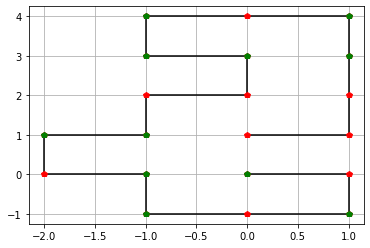

In [114]:
import matplotlib.pyplot as plt
puntos = []
hidrofobicos = []
for clave,valor in protein.items():
    puntos.append(clave)
    if is_hydrofobic(valor):
        hidrofobicos.append(clave)
coordenadasX = []
coordenadasY = []
for p in puntos:
    coordenadasX.append(p[0])
    coordenadasY.append(p[1])
hidrofobicosX = []
hidrofobicosY = []
for h in hidrofobicos:
    hidrofobicosX.append(h[0])
    hidrofobicosY.append(h[1])
plt.plot(coordenadasX, coordenadasY, 'black')
plt.plot(coordenadasX, coordenadasY, 'rp')
plt.plot(hidrofobicosX, hidrofobicosY, 'gp')
plt.grid()